## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
# !pip install pandas=="0.24.0" --quiet
# !pip install seaborn=="0.9.0" --quiet
# !pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
filmes=pd.read_csv('movies.csv')
filmes.columns = ["filmeId", "titulo", "generos"]
filmes=filmes.set_index('filmeId')

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução
notas=pd.read_csv('ratings.csv')
notas.columns=['usuarioId','filmeId','nota','momento']

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução
filmes['nota_media']=notas.groupby('filmeId').nota.mean().round(2)

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.92
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.43
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.26
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.36
5,Father of the Bride Part II (1995),Comedy,1995.0,3.07


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_notas` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme
total_de_notas=notas.groupby('filmeId').nota.count()

In [12]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_notas']=total_de_notas
filmes=filmes.query('total_de_notas>49')

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_notas
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.92,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.43,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.26,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.95,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.19,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

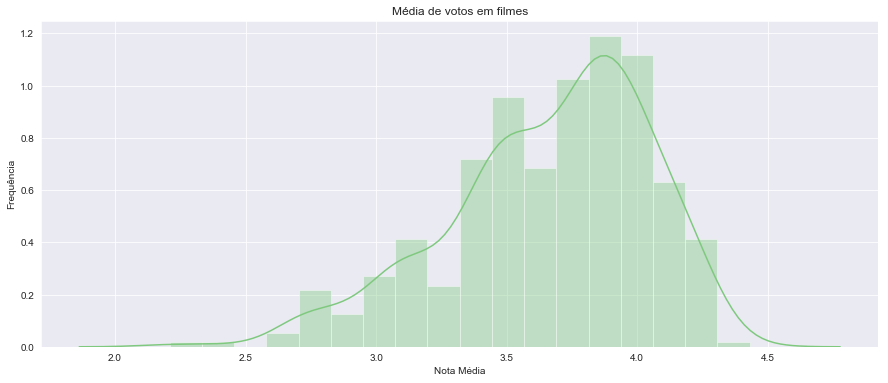

In [14]:
# solução histograma
sns.set_palette('Accent')
sns.set_style('darkgrid')
    
ax=sns.distplot(filmes.nota_media)
ax.set(xlabel='Nota Média',ylabel='Frequência')
ax.set_title('Média de votos em filmes')
ax.figure.set_size_inches(15, 6)


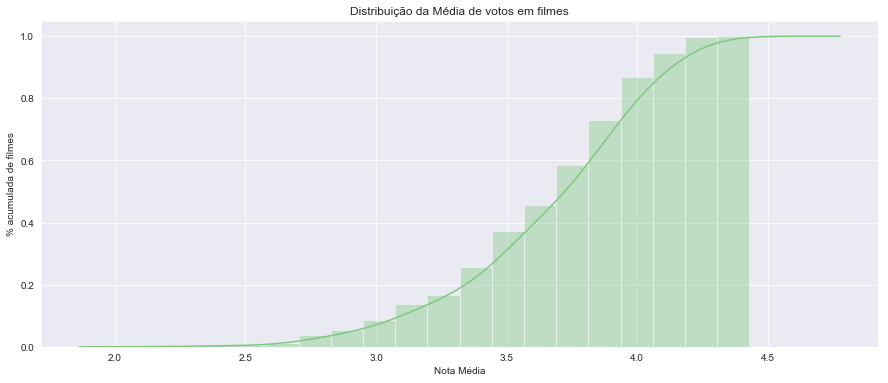

In [15]:
# solução cumulativa
ax=sns.distplot(filmes.nota_media,hist_kws={'cumulative':True},kde_kws={'cumulative':True})
ax.set(xlabel='Nota Média',ylabel='% acumulada de filmes')
ax.set_title('Distribuição da Média de votos em filmes')
ax.figure.set_size_inches(15, 6)


## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

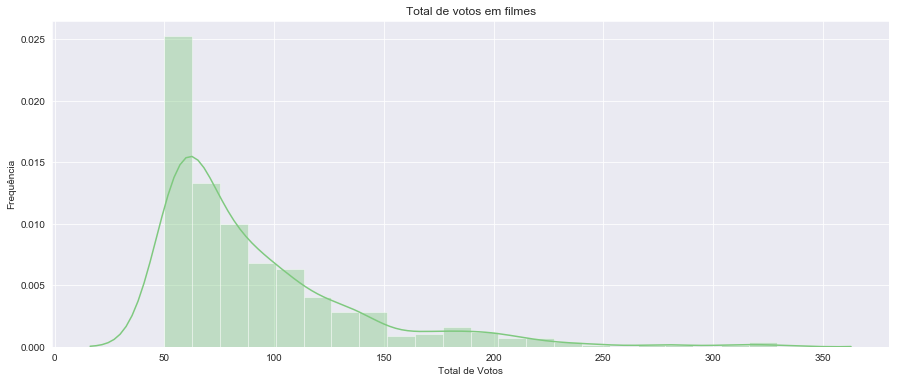

In [16]:
# solução histograma
ax=sns.distplot(filmes.total_de_notas)
ax.set(xlabel='Total de Votos',ylabel='Frequência')
ax.set_title('Total de votos em filmes')
ax.figure.set_size_inches(15, 6)


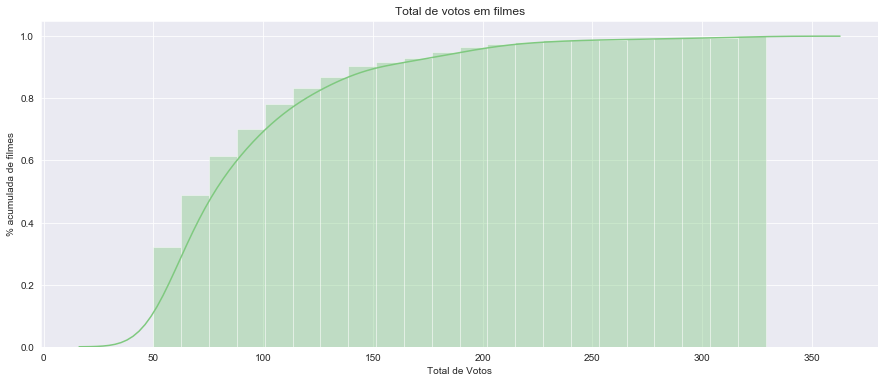

In [17]:
# solução cumulativa
ax=sns.distplot(filmes.total_de_notas,hist_kws={'cumulative':True},kde_kws={'cumulative':True})
ax.set(xlabel='Total de Votos',ylabel='% acumulada de filmes')
ax.set_title('Total de votos em filmes')
ax.figure.set_size_inches(15, 6)


## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [18]:
# solução
nota_limite_dos_20_porcento=filmes.nota_media.quantile(0.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_notas,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.92,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.43,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.26,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.95,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.19,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

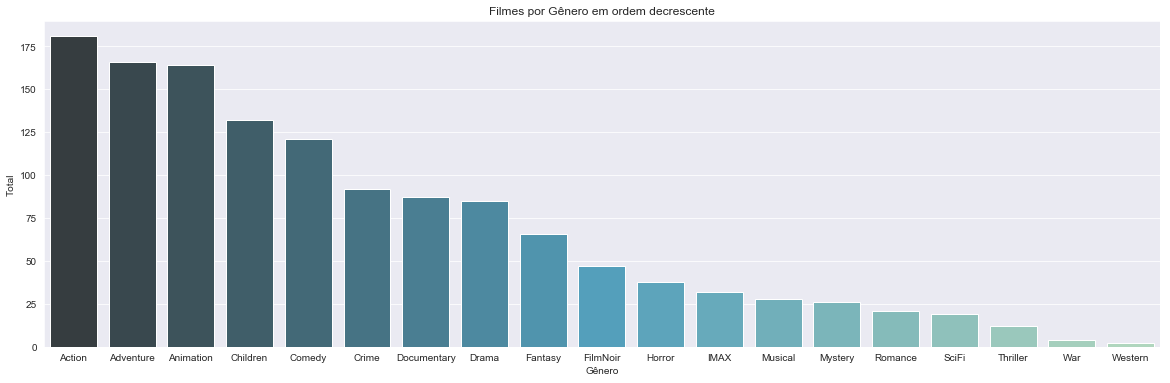

In [22]:
# solução
filmes_por_genero=generos.sum().to_frame()
filmes_por_genero.columns=["total"]
ax=sns.barplot(x=filmes_por_genero.index, y="total", data= filmes_por_genero.sort_values('total',ascending=False), palette="GnBu_d")
ax.set(xlabel='Gênero',ylabel='Total')
ax.set_title('Filmes por Gênero em ordem decrescente')
ax.figure.set_size_inches(20, 6)


## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [23]:
# solução
top5_generos_em_quantidade_de_filmes=filmes_por_genero.sort_values('total',ascending=False)[0:4].to_string(index=False)

In [24]:
print(top5_generos_em_quantidade_de_filmes)

 total
   181
   166
   164
   132


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme= pd.DataFrame((generos.values.T * filmes['total_de_notas'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
# solucão
votos_por_genero=votos_por_genero_por_filme.sum().to_frame()
votos_por_genero.columns=[ "total"]
votos_por_genero=votos_por_genero.sort_values('total',ascending=False)
votos_por_genero

,total
Action,15734.0
Drama,15445.0
Comedy,15330.0
Adventure,13117.0
Thriller,11907.0
SciFi,8989.0
Crime,8649.0
Romance,7444.0
Fantasy,5993.0
Children,4331.0


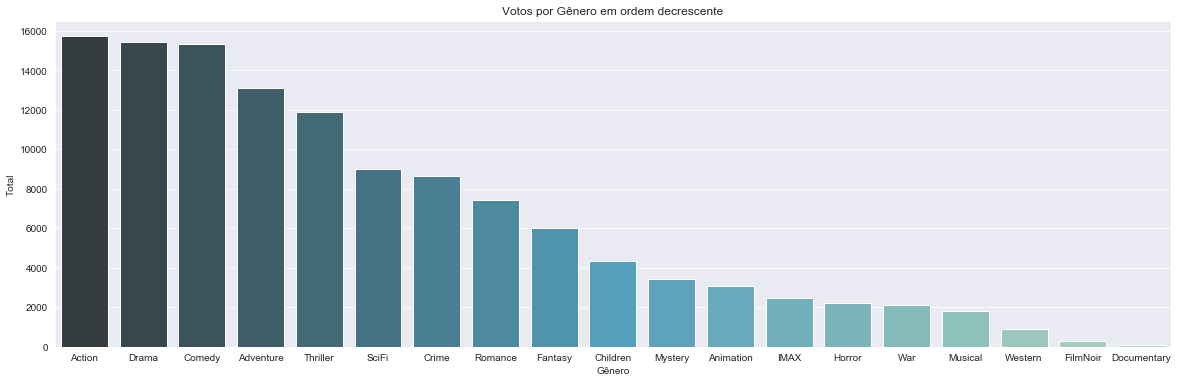

In [27]:
# solução
ax=sns.barplot(x=votos_por_genero.index, y="total", data= votos_por_genero, palette="GnBu_d")
ax.set(xlabel='Gênero',ylabel='Total')
ax.set_title('Votos por Gênero em ordem decrescente')
ax.figure.set_size_inches(20, 6)

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solucao código

popularidade_media=(votos_por_genero_por_filme.sum()/generos.sum()).to_frame()
popularidade_media.columns=["total"]
popularidade_media=popularidade_media.sort_values('total',ascending=False)

popularidade_media

,total
War,111.210526
Crime,99.413793
Adventure,99.371212
Thriller,98.404959
SciFi,97.706522
Action,95.939024
Animation,95.812500
Drama,93.042169
Children,92.148936
Mystery,90.842105


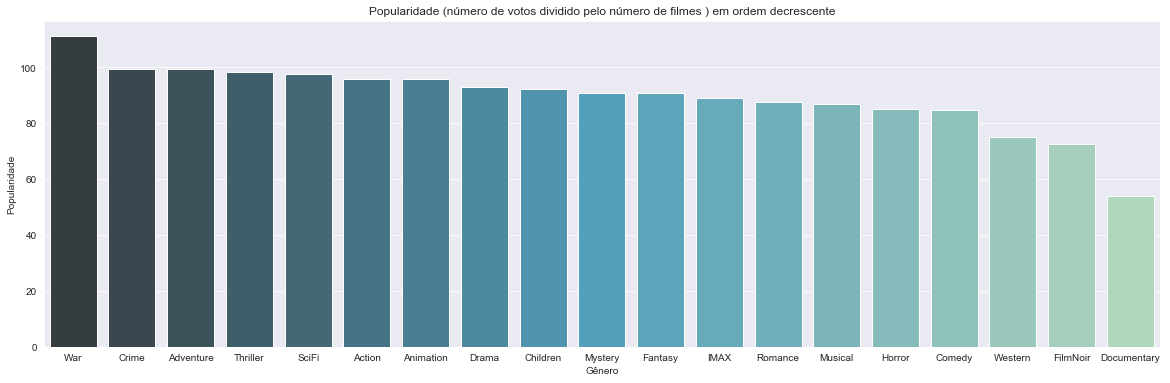

In [29]:
# solução com visualização 
ax=sns.barplot(x=popularidade_media.index, y="total", data= popularidade_media, palette="GnBu_d")
ax.set(xlabel='Gênero',ylabel='Popularidade')
ax.set_title('Popularidade (número de votos dividido pelo número de filmes ) em ordem decrescente')
ax.figure.set_size_inches(20, 6)

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):  Apesar do genero Action possuir um maior número de filmes e votos, estes fatores analisados de forma isolada não necesseriamente indicam a popularidade, uma vez que o genero War é bastante popular apesar do baixo número de filmes produzidos.
    
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0.5, 1.0, 'Distribuição do total de votos das categorias Horror e Adventure')

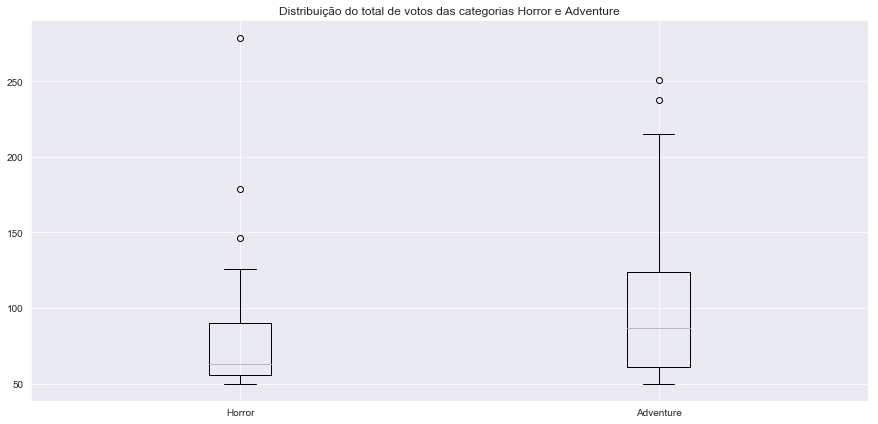

In [30]:
# solução:
import matplotlib.pyplot as plt

Horror=filmes.query('Horror==1')
Adventure=filmes.query('Adventure==1')
plt.figure(figsize=(15,7))
plt.boxplot((Horror.total_de_notas,Adventure.total_de_notas),labels=['Horror','Adventure'] )
plt.title('Distribuição do total de votos das categorias Horror e Adventure')



## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

Text(0.5, 1.0, 'Distribuição do total de votos para cada categoria')

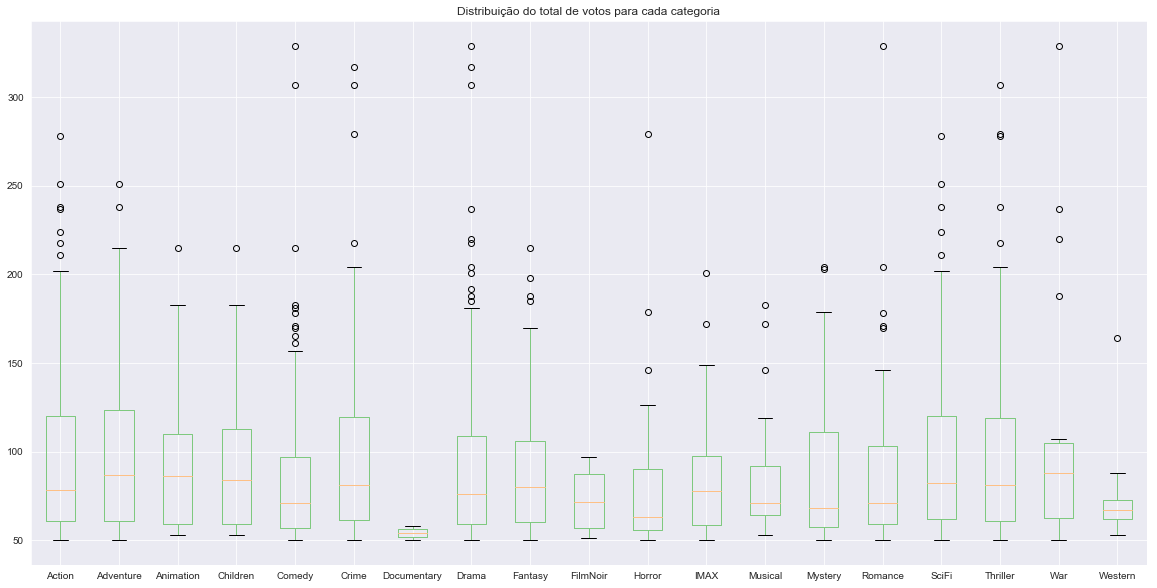

In [31]:
dist_votos=pd.DataFrame(index=filmes.index)
for i in range(0,len(generos.columns)):
    dist_votos[generos.columns[i]]=(filmes[filmes[generos.columns[i]]==1].total_de_notas)

plt.figure(figsize=(20,10))
dist_votos.boxplot()
plt.title('Distribuição do total de votos para cada categoria')

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução: Sugiro o genero Adventure, que pela análise visual parece ter um maior número de votos em seus filmes, o que indicaria um maaior número de espectadores, e consequentemente, maior chance chance de faturamento.
    


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

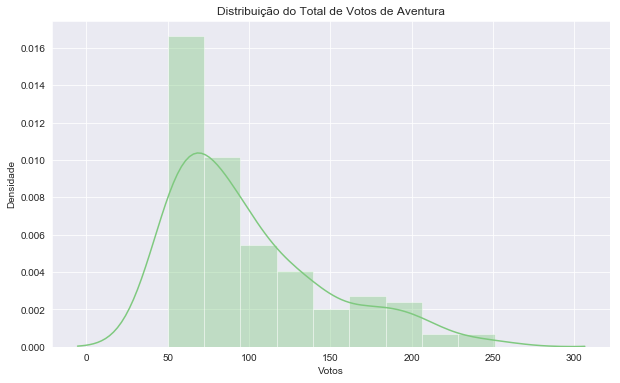

In [32]:
# solucao histograma de aventura
ax=sns.distplot(Adventure.total_de_notas)
ax.set(xlabel='Votos',ylabel='Densidade')
ax.set_title('Distribuição do Total de Votos de Aventura')
ax.figure.set_size_inches(10, 6)

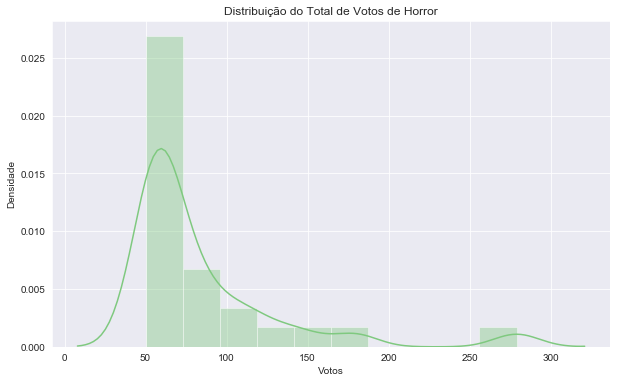

In [33]:
# solucao histograma de horror
ax=sns.distplot(Horror.total_de_notas)
ax.set(xlabel='Votos',ylabel='Densidade')
ax.set_title('Distribuição do Total de Votos de Horror')
ax.figure.set_size_inches(10, 6)

In [34]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest
_ ,p_Adventure=normaltest(Adventure.total_de_notas)
_ ,p_Horror=normaltest(Horror.total_de_notas)

print('Os valores de p foram {} para Aventura e {} para Horror, indicando que não são uma distribuição normal(<0,05)'.format(p_Adventure,p_Horror))

Os valores de p foram 5.987863006199139e-06 para Aventura e 1.2786148884334685e-07 para Horror, indicando que não são uma distribuição normal(<0,05)


In [35]:
# solução com o teste desejado

from scipy.stats import ranksums

_,p=ranksums(Adventure.total_de_notas,Horror.total_de_notas)

p

0.04782366231999856

### Solução (explique sua conclusão): Como p < 0,05 no teste de Wicoxon, há uma maior probabilidade dos filmes do genero Adventure possuírem um maior número de votos. Dessa forma, a escolha permanece a mesma.



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 1.0, 'Distribuição das Notas Médias das categorias Horror e Adventure')

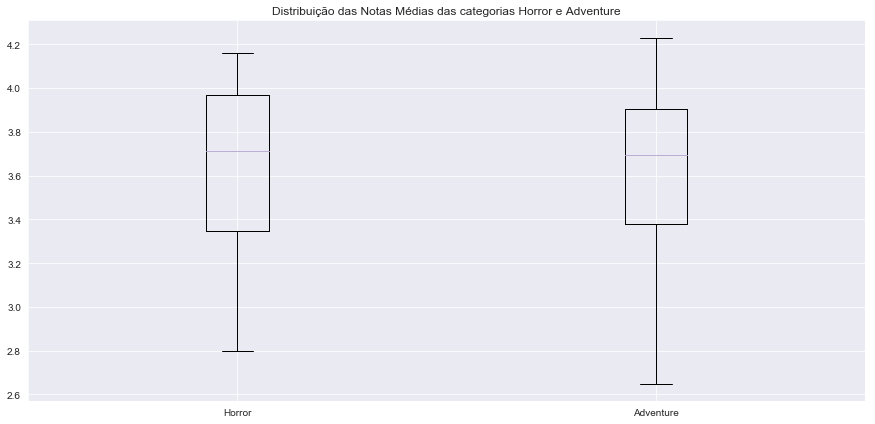

In [36]:
# solução:

plt.figure(figsize=(15,7))
plt.boxplot((Horror.nota_media,Adventure.nota_media),labels=['Horror','Adventure'] )
plt.title('Distribuição das Notas Médias das categorias Horror e Adventure')



## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução: Neste caso, uma análise visual sugere que Horror seria a melhor escolha, por aparentar possuir maior nota média em seus filmes.



## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

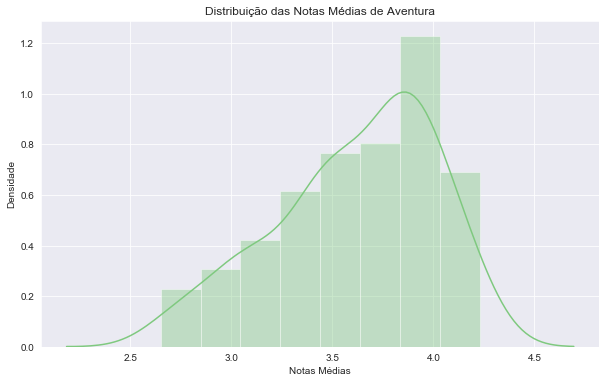

In [37]:
# solucao histograma de aventura
ax=sns.distplot(Adventure.nota_media)
ax.set(xlabel='Notas Médias',ylabel='Densidade')
ax.set_title('Distribuição das Notas Médias de Aventura')
ax.figure.set_size_inches(10, 6)

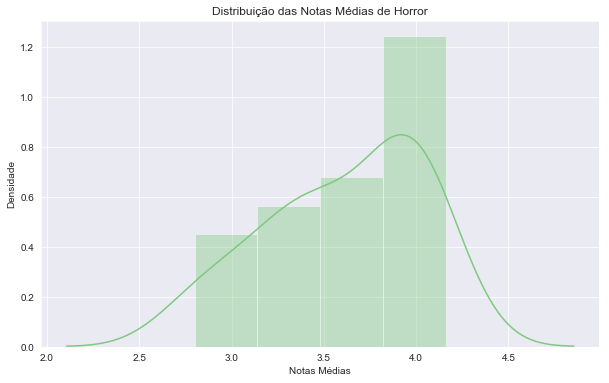

In [38]:
# solucao histograma de horror
ax=sns.distplot(Horror.nota_media)
ax.set(xlabel='Notas Médias',ylabel='Densidade')
ax.set_title('Distribuição das Notas Médias de Horror')
ax.figure.set_size_inches(10, 6)

In [39]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

_ ,p_Adventure=normaltest(Adventure.nota_media)
_ ,p_Horror=normaltest(Horror.nota_media)

print('Os valores de p foram {} para Aventura e {} para Horror, indicando que Aventura não é uma distribuição normal(<0,05)'.format(p_Adventure,p_Horror))

Os valores de p foram 0.012923175909772433 para Aventura e 0.21097715160189762 para Horror, indicando que Aventura não é uma distribuição normal(<0,05)


In [40]:
# solução com o teste desejado

_,p=ranksums(Adventure.nota_media,Horror.nota_media)

p

0.8401944736957048

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução: Com o resultado do teste de hipóteses, sabe-se que não há significância estatística na distribuição das médias, pois p > 0,05, o que indica que não se pode afirmar que um dos generos possuirá melhor desempenho 


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução: O mais recomendado seria o genero Adventure, pois seria mais popular e as médias das notas seriam semelhantes em ambos os generos



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [41]:
votos_por_genero

,total
Action,15734.0
Drama,15445.0
Comedy,15330.0
Adventure,13117.0
Thriller,11907.0
SciFi,8989.0
Crime,8649.0
Romance,7444.0
Fantasy,5993.0
Children,4331.0


In [42]:
# solução: calculando os 2 generos mais votados
mais_votados=votos_por_genero[0:2].index
mais_votados

Index(['Action', 'Drama'], dtype='object')

In [43]:
# solução: encontrando os top 5 filmes desses generos

mais_votados_filmes=filmes[(filmes[mais_votados[0]]==1) | (filmes[mais_votados[1]]==1)] 
top5=mais_votados_filmes.sort_values('nota_media',ascending=False)[0:5]

top5

,titulo,ano_de_lancamento,nota_media,total_de_notas,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.43,317.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
858,"Godfather, The (1972)",1972.0,4.29,192.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1276,Cool Hand Luke (1967),1967.0,4.27,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.27,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1221,"Godfather: Part II, The (1974)",1974.0,4.26,129.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [44]:
# solucao
corr_media=filmes[filmes.columns[1:]].corr()['nota_media'].round(3)
del corr_media['ano_de_lancamento'],corr_media['total_de_notas'],corr_media['nota_media']
corr_media=corr_media.sort_values(ascending=False)
corr_media

Drama          0.278
Crime          0.190
Mystery        0.130
War            0.126
FilmNoir       0.082
IMAX           0.064
Animation      0.043
Documentary   -0.003
Musical       -0.009
Thriller      -0.017
Fantasy       -0.022
Children      -0.030
Horror        -0.034
Western       -0.059
Romance       -0.072
Adventure     -0.080
SciFi         -0.137
Action        -0.155
Comedy        -0.255
Name: nota_media, dtype: float64

## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [45]:
# solucao
corr_media=filmes[filmes.columns[1:]].corr()['total_de_notas'].round(3)
del corr_media['ano_de_lancamento'],corr_media['total_de_notas'],corr_media['nota_media']
corr_media=corr_media.sort_values(ascending=False)
corr_media

Adventure      0.104
War            0.088
Thriller       0.086
Crime          0.080
Action         0.066
SciFi          0.064
Animation      0.023
Drama          0.019
Children       0.002
Mystery       -0.007
Fantasy       -0.010
IMAX          -0.016
Musical       -0.025
Horror        -0.036
FilmNoir      -0.039
Romance       -0.045
Documentary   -0.055
Western       -0.061
Comedy        -0.129
Name: total_de_notas, dtype: float64

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

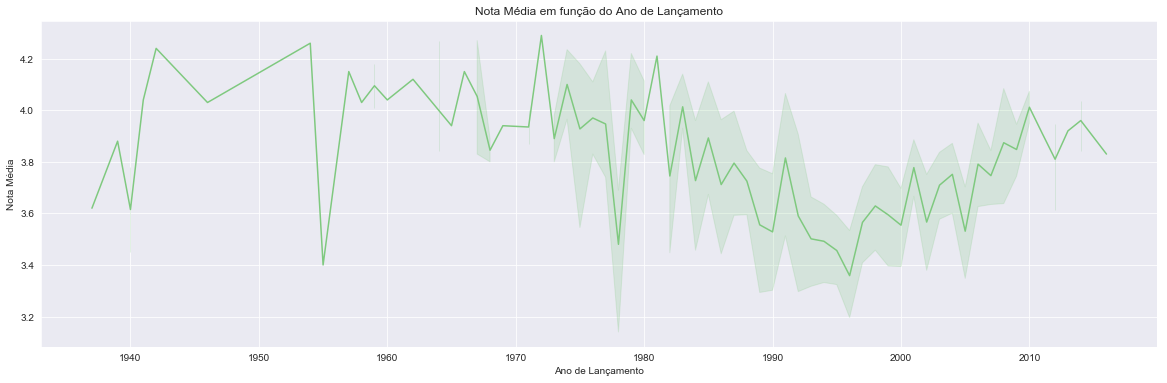

In [46]:
# solucao
ax=sns.lineplot(x=filmes.ano_de_lancamento, y=filmes.nota_media)
ax.set(xlabel='Ano de Lançamento',ylabel='Nota Média')
ax.set_title('Nota Média em função do Ano de Lançamento')
ax.figure.set_size_inches(20, 6)

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [47]:
# solução (código)
filmes['nota_media'].corr(filmes['ano_de_lancamento']).round(3)

-0.159

### Solução (explicação)  A correlação negativa seria um indicativo de que quanto mais recente o ano de lançamento menor a nota média dos filmes. Entretanto, esse número é bem pequeno, indicado uma correlação quase inexistente. Além disso, não existe muitos dados sobre filmes mais antigos, o que pode enviesar a análise.



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

Text(0.5, 1.1, 'Dispersão entre as Variáveis')

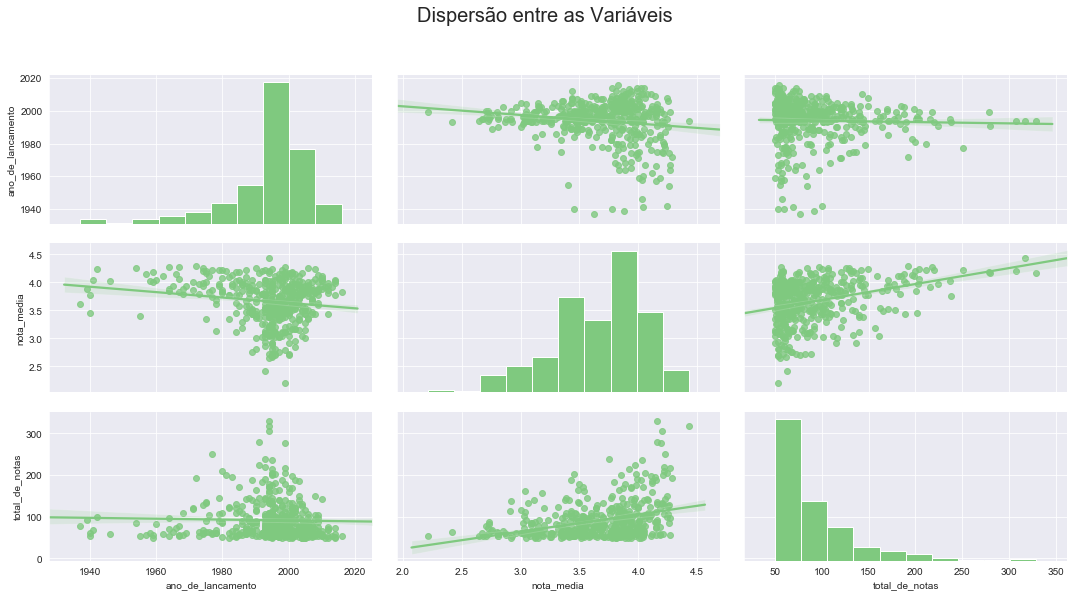

In [48]:
# solução
infos=filmes[['ano_de_lancamento','nota_media','total_de_notas']]
ax= sns.pairplot(infos,kind='reg',aspect=2)
ax.fig.suptitle('Dispersão entre as Variáveis',fontsize=20,y=1.1 )

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

Text(0.5, 1.1, 'Dispersão entre as Variáveis')

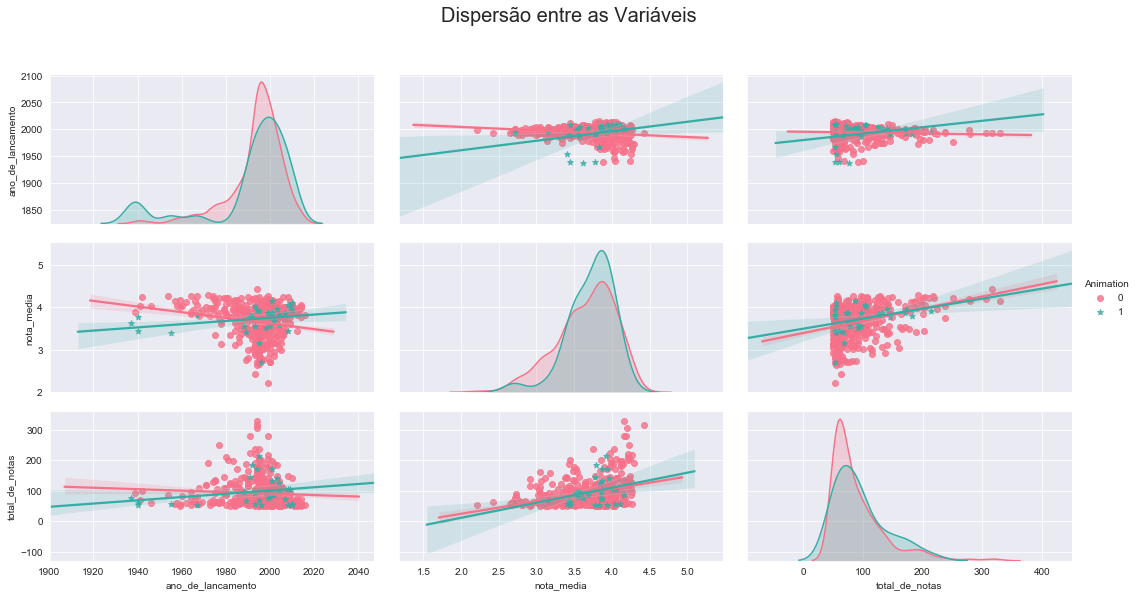

In [49]:
ax= sns.pairplot(filmes,hue='Animation',palette='husl',y_vars=['ano_de_lancamento','nota_media','total_de_notas'],x_vars=['ano_de_lancamento','nota_media','total_de_notas'],kind='reg',markers=['o','*'],aspect=2)
ax.fig.suptitle('Dispersão entre as Variáveis',fontsize=20,y=1.1 )

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução: A nota média parece aumentar com o ano de lançamento, correlação que apesar de baixa, parece ser linear, o que é o oposto do que ocorre com os demais generos. O mesmo pode ser dito para a relação do ano de lançamento com o total de votos, o que indica que esse genero pode ter conseguido maior visibilidade com o passar dos anos.



## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [50]:
# solução